## Classificador de Spam - Naive Bayes

## Link de dataset de Spam: http://www.dt.fee.unicamp.br/~tiago//youtubespamcollection/

## Importa todos os pacotes de Processamento de Linguagem Natural

In [1]:
#import nltk
#nltk.download('all')
import re
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.model_selection import cross_val_predict

## Ler arquivo de dados  - SMS de celular

In [2]:
!ls *.csv

Youtube 01-comments-Psy.csv spam.csv


In [4]:
!head 'Youtube 01-comments-Psy.csv'

In [19]:
# Dados coletados e Classificados de SMS de celular
dataset = pd.read_csv('Youtube 01-comments-Psy.csv', encoding='latin-1')
dataset.head(10)

,COMMENT_ID,AUTHOR,DATE,text,CLASS
0,LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU,Julius NM,2013-11-07T06:20:48,"Huh, anyway check out this you[tube] channel: ...",1
1,LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A,adam riyati,2013-11-07T12:37:15,Hey guys check out my new channel and our firs...,1
2,LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8,Evgeny Murashkin,2013-11-08T17:34:21,just for test I have to say murdev.com,1
3,z13jhp0bxqncu512g22wvzkasxmvvzjaz04,ElNino Melendez,2013-11-09T08:28:43,me shaking my sexy ass on my channel enjoy ^_^...,1
4,z13fwbwp1oujthgqj04chlngpvzmtt3r3dw,GsMega,2013-11-10T16:05:38,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1
5,LZQPQhLyRh9-wNRtlZDM90f1k0BrdVdJyN_YsaSwfxc,Jason Haddad,2013-11-26T02:55:11,"Hey, check out my new website!! This site is a...",1
6,z13lfzdo5vmdi1cm123te5uz2mqig1brz04,ferleck ferles,2013-11-27T21:39:24,Subscribe to my channel ï»¿,1
7,z122wfnzgt30fhubn04cdn3xfx2mxzngsl40k,Bob Kanowski,2013-11-28T12:33:27,i turned it on mute as soon is i came on i jus...,0
8,z13ttt1jcraqexk2o234ghbgzxymz1zzi04,Cony,2013-11-28T16:01:47,You should check my channel for Funny VIDEOS!!ï»¿,1
9,z12avveb4xqiirsix04chxviiljryduwxg0,BeBe Burkey,2013-11-28T16:30:13,and u should.d check my channel and tell me wh...,1


In [20]:
# classe = 1 - SPAM
# classe = 0 - NÃO SPAM - HAM
dataset = dataset.loc[:, ['text','CLASS']]
dataset.columns = [ 'texto', 'classe']
dataset.head()

,texto,classe
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^...,1
4,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1


In [21]:
# número de tuplas
print("Número de linhas: ",len(dataset))

Número de linhas:  350


In [22]:
# número de atributos
print("Número de atributos: ",len(dataset.columns))

Número de atributos:  2


In [23]:
# atributos
dataset.columns

Index(['texto', 'classe'], dtype='object')

In [24]:
# dataset
dataset.head(8)

,texto,classe
0,"Huh, anyway check out this you[tube] channel: ...",1
1,Hey guys check out my new channel and our firs...,1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^...,1
4,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1
5,"Hey, check out my new website!! This site is a...",1
6,Subscribe to my channel ï»¿,1
7,i turned it on mute as soon is i came on i jus...,0


## Limpando o dataset

In [29]:
#pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 500)

#dataset2 = dataset.loc[:, ['v1', 'v2']]
dataset.columns = [ 'texto', 'classe']
dataset2 = dataset.copy()
dataset2.head(10)

,texto,classe
0,"Huh, anyway check out this you[tube] channel: kobyoshi02",1
1,"Hey guys check out my new channel and our first vid THIS IS US THE MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment and please subscribe!!!!",1
2,just for test I have to say murdev.com,1
3,me shaking my sexy ass on my channel enjoy ^_^ ï»¿,1
4,watch?v=vtaRGgvGtWQ Check this out .ï»¿,1
5,"Hey, check out my new website!! This site is about kids stuff. kidsmediausa . com",1
6,Subscribe to my channel ï»¿,1
7,i turned it on mute as soon is i came on i just wanted to check the views...ï»¿,0
8,You should check my channel for Funny VIDEOS!!ï»¿,1
9,and u should.d check my channel and tell me what I should do next!ï»¿,1


In [30]:
dataset2.classe.value_counts()

1    175
0    175
Name: classe, dtype: int64

In [31]:
ham = dataset2.classe.value_counts()[0]
spam = dataset2.classe.value_counts()[1]
ham, spam

(175, 175)

In [32]:
print('ham =', round(ham/ (ham+spam) * 100), '%')
print('spam =', round(spam/ (ham+spam) * 100), '%')

ham = 50.0 %
spam = 50.0 %


In [33]:
dataset2.tail()

,texto,classe
345,How can this have 2 billion views when there's only me on the planet? LOLï»¿,0
346,I don't now why I'm watching this in 2014ï»¿,0
347,subscribe to me for call of duty vids and give aways Goal-100 subsï»¿,1
348,hi guys please my android photo editor download. thanks https://play.google.com/store/apps/details?id=com.butalabs.photo.editorï»¿,1
349,"The first billion viewed this because they thought it was really cool, the other billion and a half came to see how stupid the first billion were...ï»¿",0


## Pre-Processamento 

### Separando SMS e suas classes

In [34]:
texto = dataset2['texto'].values
classes = dataset2['classe'].values

In [36]:
print(texto[:10])

['Huh, anyway check out this you[tube] channel: kobyoshi02'
 "Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!"
 'just for test I have to say murdev.com'
 'me shaking my sexy ass on my channel enjoy ^_^ ï»¿'
 'watch?v=vtaRGgvGtWQ   Check this out .ï»¿'
 'Hey, check out my new website!! This site is about kids stuff. kidsmediausa  . com'
 'Subscribe to my channel ï»¿'
 'i turned it on mute as soon is i came on i just wanted to check the  views...ï»¿'
 'You should check my channel for Funny VIDEOS!!ï»¿'
 'and u should.d check my channel and tell me what I should do next!ï»¿']


In [37]:
print(classes[:10])

[1 1 1 1 1 1 1 0 1 1]


In [39]:
print(texto[classes == 0][:10]) # HAM

['i turned it on mute as soon is i came on i just wanted to check the  views...ï»¿'
 "I'm only checking the viewsï»¿"
 'i think about 100 millions of the views come from people who only wanted to  check the viewsï»¿'
 'just checking the viewsï»¿'
 'I dont even watch it anymore i just come here to check on 2 Billion or notï»¿'
 'Came here to check the views, goodbye.ï»¿' '2 billion....Coming soonï»¿'
 'Why dafuq is a Korean song so big in the USA. Does that mean we support  Koreans? Last time I checked they wanted to bomb us. ï»¿'
 'now its 1,884,034,783 views! pls. comment the view count the next hour :Pï»¿'
 'go here to check the views :3ï»¿']


In [40]:
print(texto[classes == 1][:10]) # SPAM

['Huh, anyway check out this you[tube] channel: kobyoshi02'
 "Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!!"
 'just for test I have to say murdev.com'
 'me shaking my sexy ass on my channel enjoy ^_^ ï»¿'
 'watch?v=vtaRGgvGtWQ   Check this out .ï»¿'
 'Hey, check out my new website!! This site is about kids stuff. kidsmediausa  . com'
 'Subscribe to my channel ï»¿'
 'You should check my channel for Funny VIDEOS!!ï»¿'
 'and u should.d check my channel and tell me what I should do next!ï»¿'
 'Hey subscribe to meï»¿']


# Gerando o modelo

In [41]:
vectorizer = CountVectorizer(analyzer="word")
freq_texto = vectorizer.fit_transform(texto)
freq_texto.toarray()[:3]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [42]:
(freq_texto.toarray()).shape

(350, 1482)

## aplicando o Naive Bayes

In [43]:
modelo = MultinomialNB()
modelo.fit(freq_texto,classes)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### Testando o modelo com algumas instâncias simples

In [44]:
testes = ["Yes i have. So that's why u texted. Pshew...missing you so much",
          'Free entry Katty Perry Show, click here...',
          'Winner!!! are you wish to win a lottery',
          'Have a safe trip to  Russia! enjoy...',
          'Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min',
          'Temporal Convolutional Nets Take Over from RNNs for NLP Predictions',
          'U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute'
         ]

In [45]:
freq_testes = vectorizer.transform(testes)

In [46]:
freq_testes.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [47]:
# Fazendo a classificação com o modelo treinado.
modelo.predict(freq_testes)

array([0, 1, 0, 1, 0, 0, 0])

In [48]:
tweets = testes
classificacao = modelo.predict(freq_testes)

print ("Novas Instancias Classificadas...")
for i in range(len(testes)):
    print (classificacao[i], " -> ", tweets[i] )

Novas Instancias Classificadas...
0  ->  Yes i have. So that's why u texted. Pshew...missing you so much
1  ->  Free entry Katty Perry Show, click here...
0  ->  Winner!!! are you wish to win a lottery
1  ->  Have a safe trip to  Russia! enjoy...
0  ->  Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min
0  ->  Temporal Convolutional Nets Take Over from RNNs for NLP Predictions
0  ->  U have won the å£750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute


## Avaliando o modelo 

In [49]:
# Fazendo o cross validation do modelo
import numpy as np
resultados = cross_val_predict(modelo, freq_texto, classes, cv=10)

In [50]:
resultados[:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [51]:
# Medindo a acurácia média do modelo
metrics.accuracy_score(classes,resultados)

0.9657142857142857

In [52]:
freq_texto.count_nonzero()

4379

### Matriz de Confusão

In [53]:
# Matriz de confusão
print (pd.crosstab(classes, resultados, rownames=['REAL'], colnames=['PREDITO'], margins=True))

PREDITO    0    1  All
REAL                  
0        168    7  175
1          5  170  175
All      173  177  350


In [56]:
# Medidas de validação do modelo
classe=[0,1] #['ham','spam']
print (metrics.classification_report(classes,resultados,classe))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       175
           1       0.96      0.97      0.97       175

    accuracy                           0.97       350
   macro avg       0.97      0.97      0.97       350
weighted avg       0.97      0.97      0.97       350



# Visualizando os Spam's

In [57]:
text_spam = texto[classes == 1 ] # 'spam']
spam = ""
for i in range(len(text_spam)):
    spam = spam + ' ' + text_spam[i]
spam[:500]

" Huh, anyway check out this you[tube] channel: kobyoshi02 Hey guys check out my new channel and our first vid THIS IS US THE  MONKEYS!!! I'm the monkey in the white shirt,please leave a like comment  and please subscribe!!!! just for test I have to say murdev.com me shaking my sexy ass on my channel enjoy ^_^ ï»¿ watch?v=vtaRGgvGtWQ   Check this out .ï»¿ Hey, check out my new website!! This site is about kids stuff. kidsmediausa  . com Subscribe to my channel ï»¿ You should check my channel for "

In [58]:
#!pip install wordcloud

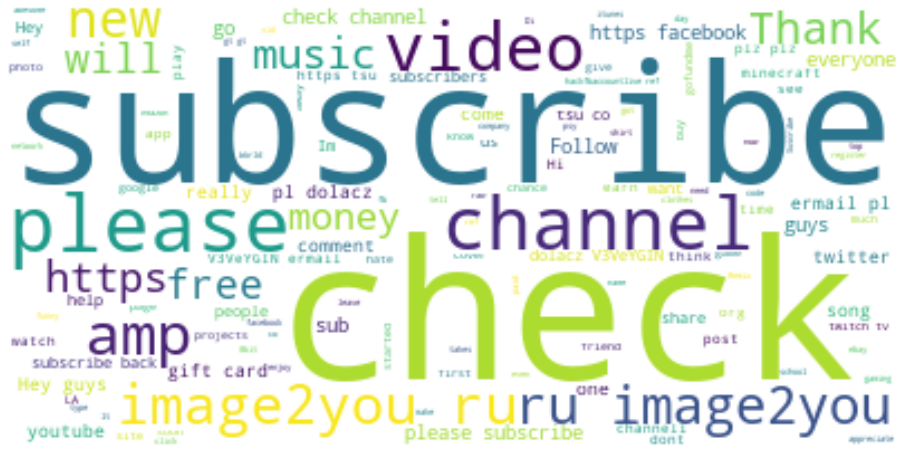

In [60]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white", max_words=1000)
# generate word cloud
#wc.generate_from_frequencies(spam)
wc.generate_from_text(spam)
# show
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [61]:
text_ham = texto[classes == 0] #'ham']
ham = ""
for i in range(len(text_spam)):
    ham = ham + ' ' + text_ham[i]
ham[:500]

" i turned it on mute as soon is i came on i just wanted to check the  views...ï»¿ I'm only checking the viewsï»¿ i think about 100 millions of the views come from people who only wanted to  check the viewsï»¿ just checking the viewsï»¿ I dont even watch it anymore i just come here to check on 2 Billion or notï»¿ Came here to check the views, goodbye.ï»¿ 2 billion....Coming soonï»¿ Why dafuq is a Korean song so big in the USA. Does that mean we support  Koreans? Last time I checked they wanted to"

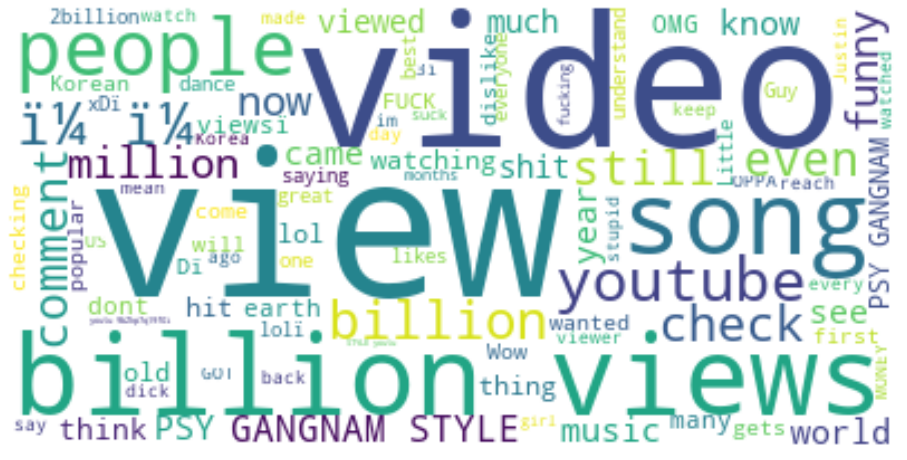

In [62]:
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud(background_color="white", max_words=1000)
# generate word cloud
#wc.generate_from_frequencies(spam)
wc.generate_from_text(ham)
# show
plt.figure(figsize=(16,12))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

---